In [26]:
import mphot
import numpy as np
import matplotlib.pyplot as plt

In [27]:
instrument_efficiency_path = '../resources/systems/speculoos_Andor_iKon-L-936_-60.csv' # index in microns, efficiency of telescope+instrument as fraction
filter_path = '../resources/filters/I+z.csv' # index in microns, filter efficiency as fraction

name, system_response = mphot.generate_system_response(instrument_efficiency_path, filter_path)

`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

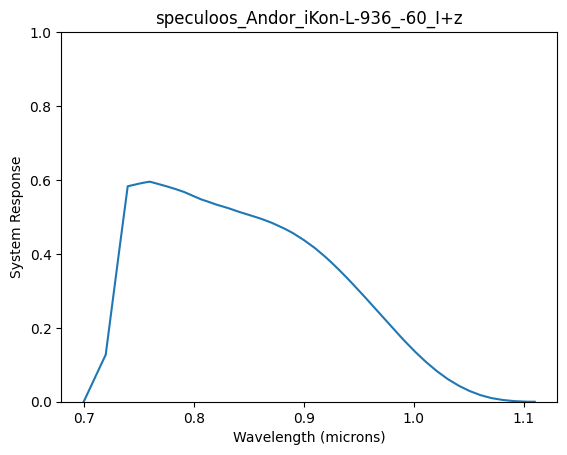

In [28]:
system_response.plot(xlabel='Wavelength (microns)', ylabel='System Response', title=name, ylim=(0, 1))

In [29]:
# sky properties
props_sky = {
    "pwv" : 2.5,        # PWV [mm]
    "airmass" : 1.1,    # airmass
    "seeing" : 1.35     # seeing (==FWHM) ["]
}

# instrument properties
props_instrument = {
    "name" : name,          # name to get SR/precision grid from file
    "plate_scale" : 0.35,   # pixel plate scale ["]
    "N_dc" : 0.2,           # dark current [e/pix/s]
    "N_rn" : 6.328,         # read noise [e_rms/pix]
    "well_depth" : 64000,   # well depth [e/pix]
    "well_fill" : 0.7,      # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time" : 10.5,     # read time between images [s]
    "r0" : 0.5,             # radius of telescope's primary mirror [m]
    "r1" : 0.14,            # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 2566       # [K]
distance = 12.5   # [pc]


In [44]:
ranges1 = {
    "plate_scale" : [0.1, 2, props_instrument['plate_scale']],
    "N_dc" : [0, 1000, props_instrument['N_dc']],
    "N_rn" : [0, 100, props_instrument['N_rn']],
    "well_depth" : [0, 1e5, props_instrument['well_depth']],
    "well_fill" : [0, 1, props_instrument['well_fill']],
    "read_time" : [0, 30, props_instrument['read_time']],
    "r0" : [0.5, 2, props_instrument['r0']],
    # "r1" : [0, 0.49, props_instrument['r1']],
    "ap_rad" : [0.1, 5, props_instrument['ap_rad']]
}

results1 = {}
current1 = {}

image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)

In [45]:
for key in ranges1:
    print(key)
    bp1 = []
    for v in np.linspace(ranges1[key][0], ranges1[key][1], 40):
        # print(v)
        props_instrument[key] = v
        
        image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)
        
        bp1.append(binned_precision1['All']*1000)
    
    results1[key] = bp1
    
    # return to default value
    props_instrument[key] = ranges1[key][2]
    
    # calc current val
    image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)
    
    current1[key] = {}
    current1[key]['x'] = ranges1[key][2]
    current1[key]['bp'] = binned_precision1['All']*1000

plate_scale
N_dc
N_rn
well_depth


/Users/peter/Github/mphot/src/mphot/mphot.py:646: RuntimeWarning: divide by zero encountered in scalar power
  * t**-1
/Users/peter/Github/mphot/src/mphot/mphot.py:642: RuntimeWarning: invalid value encountered in scalar multiply
  np.sqrt(
/Users/peter/Github/mphot/src/mphot/mphot.py:905: RuntimeWarning: divide by zero encountered in scalar divide
  precision_star = 1 / np.sqrt(N_star * t)
/Users/peter/Github/mphot/src/mphot/mphot.py:907: RuntimeWarning: invalid value encountered in scalar divide
  precision_sky = np.sqrt(npix * (N_sky * t)) / (N_star * t)
/Users/peter/Github/mphot/src/mphot/mphot.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision_dc = np.sqrt(npix * (N_dc * t)) / (N_star * t)
/Users/peter/Github/mphot/src/mphot/mphot.py:909: RuntimeWarning: divide by zero encountered in scalar divide
  precision_rn = np.sqrt(npix * (N_rn**2)) / (N_star * t)


well_fill
read_time
r0
ap_rad


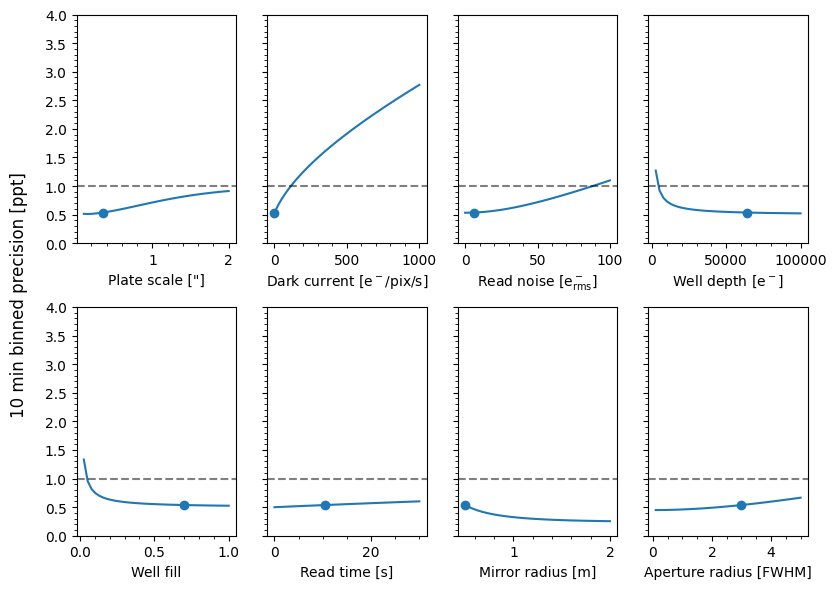

In [50]:
nice_names = {
    "plate_scale" : "Plate scale [\"]",
    "N_dc" : "Dark current [e$^-$/pix/s]",
    "N_rn" : "Read noise [e$^-_\mathregular{rms}$]",
    "well_depth" : "Well depth [e$^-$]",
    "well_fill" : "Well fill",
    "read_time" : "Read time [s]",
    "r0" : "Mirror radius [m]",
    # "r1" : [0, 0.49, 0.14],
    "ap_rad" : "Aperture radius [FWHM]"
}

fig, ax = plt.subplots(2,4, sharey=True, figsize=(8,6))

counter = 0
for key in ranges1:
    
    x = np.linspace(ranges1[key][0], ranges1[key][1], 40)
    y1 = results1[key]
    # y2 = results2[key]
    
    ax[int(counter/4), counter%4].plot(x, y1, color="tab:blue")
    # ax[int(counter/4), counter%4].plot(x, y2, color="tab:orange")
    ax[int(counter/4), counter%4].set(xlabel=nice_names[key], ylim=[0,4])
    ax[int(counter/4), counter%4].minorticks_on()
    
    ax[int(counter/4), counter%4].plot(current1[key]['x'], current1[key]['bp'], marker='o', color="tab:blue")
    # ax[int(counter/4), counter%4].plot(current2[key]['x'], current2[key]['bp'], marker='o', color="tab:orange")
    
    ax[int(counter/4), counter%4].axhline(1, linestyle='--', color='k', alpha=0.5)
    
    counter += 1
    

fig.text(-0.03, 0.5, "10 min binned precision [ppt]", ha='center', va='center', rotation='vertical', fontsize=12)


plt.tight_layout()

In [36]:
sky_ranges = {
    "pwv" : [0.05, 20, props_sky['pwv']],
    "airmass" : [1, 3, props_sky['airmass']],
    "seeing" : [0.05, 3, props_sky['seeing']]
}

results1 = {}

current1 = {}

image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)

In [37]:
for key in sky_ranges:
    print(key)
    bp1 = []
    bp2 = []
    for v in np.linspace(sky_ranges[key][0], sky_ranges[key][1], 50):
        # print(v)
        props_sky[key] = v
        
        image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)
        
        bp1.append(binned_precision1['All']*1000)
    
    results1[key] = bp1
    
    # return to default value
    props_sky[key] = sky_ranges[key][2]    
    
    # calc current val
    image_precision1, binned_precision1, components1 = mphot.get_precision(props_instrument, props_sky, Teff, distance)
    
    current1[key] = {}
    current1[key]['x'] = sky_ranges[key][2]
    current1[key]['bp'] = binned_precision1['All']*1000
        

pwv
airmass
seeing


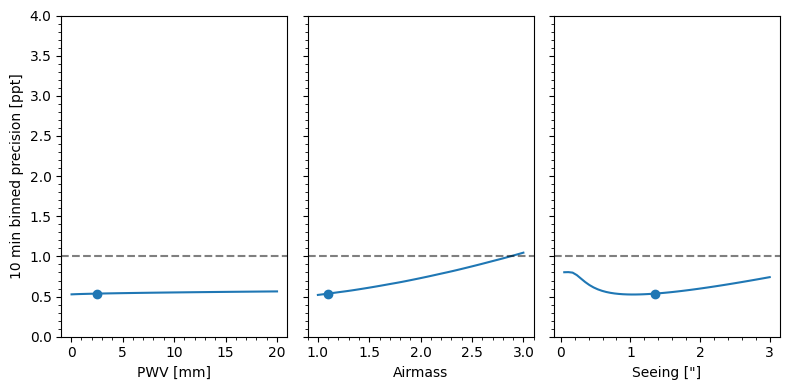

In [42]:
nice_names = {
    "pwv" : "PWV [mm]",
    "airmass" : "Airmass",
    "seeing" : "Seeing [\"]"
}

fig, ax = plt.subplots(1,3, sharey=True, figsize=(8,4))

counter = 0
for key in sky_ranges:
    
    x = np.linspace(sky_ranges[key][0], sky_ranges[key][1], 50)
    y1 = results1[key]
    # y2 = results2[key]
    
    ax[counter].plot(x, y1, color="tab:blue")
    # ax[counter].plot(x, y2, color="tab:orange")
    ax[counter].set(xlabel=nice_names[key], ylim=[0,4])
    ax[counter].minorticks_on()
    
    ax[counter].plot(current1[key]['x'], current1[key]['bp'], marker='o', color="tab:blue")
    # ax[counter].plot(current2[key]['x'], current2[key]['bp'], marker='o', color="tab:orange")
    
    ax[counter].axhline(1, linestyle='--', color='k', alpha=0.5)
    
    counter += 1
    

ax[0].set_ylabel("10 min binned precision [ppt]")

plt.tight_layout()